In [11]:
import json
import numpy as np

# 指定 JSON 文件路径
file_path = '/home/admin123/SATData/Run/SeEANet/04-15-10:59:08/MJ_PCA_1_256/metrics.json'  # 替换为你的 JSON 文件路径

try:
    # 打开并读取 JSON 文件
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)  # 将 JSON 数据加载为 Python 对象

    # 打印读取到的数据
    print("读取到的 JSON 数据：")
    print(data)


except FileNotFoundError:
    print(f"错误：文件 {file_path} 未找到。")
except json.JSONDecodeError as e:
    print(f"错误：解析 JSON 文件时出错。错误信息：{e}")
except Exception as e:
    print(f"未知错误：{e}")

print(np.array(data['mae']).shape)

读取到的 JSON 数据：
{'rmse': [[0.09911345936356242, 0.0923190281786636, 0.08794485114780477], [0.17787967234363877, 0.16363702963036655, 0.15851326553859876], [0.10048009340462104, 0.08264529503100985, 0.08085342779264663], [0.11642181273251247, 0.10694812432072631, 0.10796071503631001], [0.10354937147282915, 0.09170901882953746, 0.08930919574734376]], 'mae': [[0.07209936529397964, 0.06878185272216797, 0.06672611832618713], [0.13358552753925323, 0.125854954123497, 0.12246333807706833], [0.06671583652496338, 0.06289847195148468, 0.0606062225997448], [0.08363508433103561, 0.07978875935077667, 0.07666437327861786], [0.06956770271062851, 0.06609717011451721, 0.06394028663635254]], 'r2': [[0.999981701374054, 0.9999778270721436, 0.999970555305481], [0.9999376535415649, 0.9999302625656128, 0.9999048709869385], [0.9999813437461853, 0.9999820590019226, 0.9999749064445496], [0.9999749064445496, 0.9999696612358093, 0.9999558925628662], [0.9999797344207764, 0.9999786019325256, 0.9999706149101257]]}
(5, 

In [ ]:
import os

# 指定父文件夹路径
parent_folder = '/home/admin123/SATData/Run/SeEANet/04-15-10:59:08'  # 替换为你的父文件夹路径

# 获取父文件夹中的所有子文件夹名称
subfolders = [name for name in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, name))]

# 自定义排序函数：提取倒数第二个数字
def sort_key(folder_name):
    # 假设文件夹名称格式为 MJ_PCA_1_256，提取倒数第二个数字
    parts = folder_name.split('_')  # 按下划线分割
    if len(parts) >= 2 and parts[-2].isdigit():  # 确保倒数第二个部分是数字
        return int(parts[-2])  # 返回倒数第二个数字作为排序键
    else:
        return float('inf')  # 如果不符合格式，放在最后

# 对子文件夹进行排序
sorted_subfolders = sorted(subfolders, key=sort_key)

# 打印排序后的子文件夹列表
print("排序后的子文件夹列表：")
for folder in sorted_subfolders:
    print(folder)

排序后的子文件夹列表：
MJ_PCA_1_256
MJ_PCA_5_256
MJ_PCA_10_256
MJ_PCA_15_256
MJ_PCA_20_256
MJ_PCA_25_256
MJ_PCA_30_256
MJ_PCA_35_256


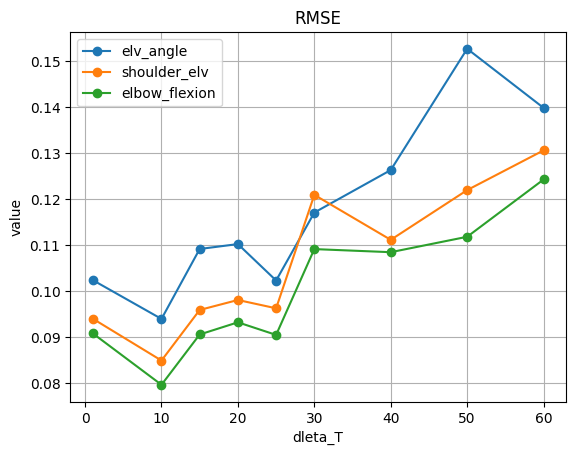

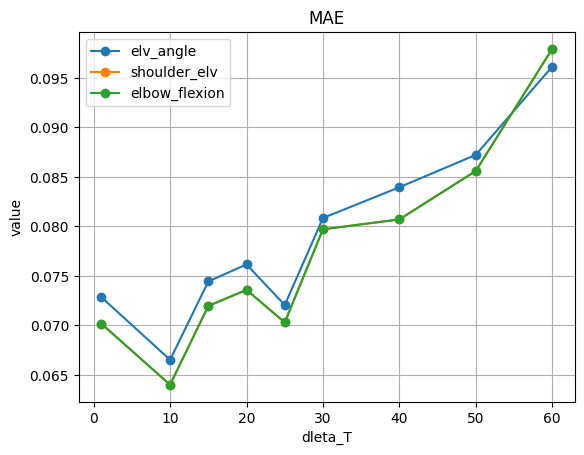

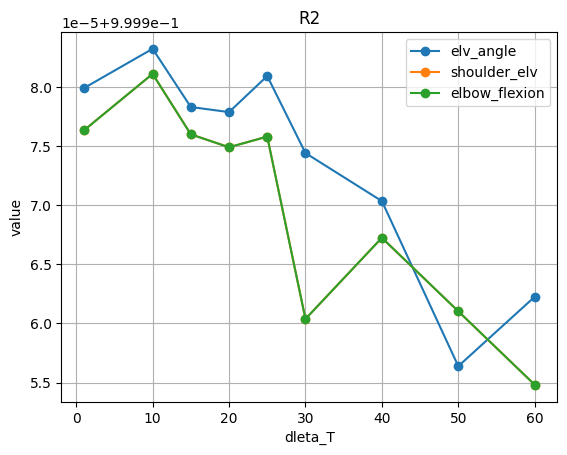

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
rmseL = np.array([
    [0.10237296, 0.09396917, 0.09077574],
    [0.0939072, 0.08483645, 0.07955739],
    [0.10914786, 0.0958618, 0.09051707],
    [0.11021526, 0.09803324, 0.09316997],
    [0.10227798, 0.09622285, 0.09042546],
    [0.11708251, 0.12094003, 0.10912295],
    [0.12634511, 0.11113966, 0.10844835],
    [0.15277019, 0.12197829, 0.11180878],
    [0.13988891, 0.13063756, 0.12429301]])

maeL = np.array([
    [0.07286412, 0.0701846, 0.0701846],
    [0.06653097, 0.06401513, 0.06401513],
    [0.07445034, 0.07197498, 0.07197498],
    [0.07616316, 0.07359703, 0.07359703],
    [0.07206213, 0.07030632, 0.07030632],
    [0.08084937, 0.0797092, 0.0797092],
    [0.08395319, 0.08070797, 0.08070797],
    [0.08722488, 0.08560005, 0.08560005],
    [0.09613641, 0.09793096, 0.09793096]])


r2L = np.array([
    [0.99997987, 0.9999763, 0.9999763],
    [0.9999832, 0.99998108, 0.99998108],
    [0.99997828, 0.99997597, 0.99997597],
    [0.99997785, 0.99997488, 0.99997488],
    [0.9999809, 0.99997578, 0.99997578],
    [0.99997439, 0.99996037, 0.99996037],
    [0.99997033, 0.99996723, 0.99996723],
    [0.99995638, 0.99996102, 0.99996102],
    [0.99996225, 0.99995481, 0.99995481]])

# 绘制rmse

# elv_angle         肩部外展/内收角度
# shoulder_elv      肩部屈伸角度
# elbow_flexion     肘部屈伸角度
delta_Tlist = [1, 10, 15, 20, 25, 30, 40, 50, 60]
plt.figure()
plt.plot(delta_Tlist, rmseL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, rmseL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.grid()
plt.legend()
plt.title("RMSE")
# plt.scatter(x, y, color='r', label='Points')  # 单独绘制点 


plt.figure()
plt.plot(delta_Tlist, maeL[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, maeL[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, maeL[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.title("MAE")
plt.grid()
plt.legend()


plt.figure()
plt.plot(delta_Tlist, r2L[:,0], marker='o', linestyle='-', label='elv_angle')  # 线条和点
plt.plot(delta_Tlist, r2L[:,1], marker='o', linestyle='-', label='shoulder_elv')  # 线条和点
plt.plot(delta_Tlist, r2L[:,2], marker='o', linestyle='-', label='elbow_flexion')  # 线条和点
plt.xlabel("dleta_T")
plt.ylabel("value")
plt.title("R2")
plt.grid()
plt.legend()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义一个通用的神经网络
class LinearCombinationNet(nn.Module):
    def __init__(self, num_inputs):
        super(LinearCombinationNet, self).__init__()
        # 定义一个线性层，输入维度是 num_inputs，输出维度是 1
        # 这个线性层会学习每个输入信号的权重
        self.linear = nn.Linear(num_inputs, 1)
    
    def forward(self, *inputs):
        # 将多个输入信号拼接成一个向量
        concatenated_inputs = torch.cat(inputs, dim=2)
        print(concatenated_inputs.shape)
        # 通过线性层进行线性组合
        output = self.linear(concatenated_inputs)
        return output

# 假设有 3 个输入信号
num_inputs = 3
model = LinearCombinationNet(num_inputs)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 假设我们有一些训练数据
# 生成一些假数据用于演示
num_samples = 100
x1 = torch.randn(24,num_samples, 1)  # 第一个信号
x2 = torch.randn(24, num_samples, 1)  # 第二个信号
x3 = torch.randn(24, num_samples, 1)  # 第三个信号
# 假设目标值是 x1 * 2 + x2 * 3 + x3 * 4
y = x1 * 2 + x2 * 3 + x3 * 4

# 训练网络
num_epochs = 2
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x1, x2, x3)
    loss = criterion(outputs, y)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# 打印学习到的权重
print(f'Learned weights: {model.linear.weight.detach().numpy().flatten()}')
print(f'Learned bias: {model.linear.bias.item():.4f}')

torch.Size([24, 100, 3])
torch.Size([24, 100, 3])
Learned weights: [-0.1376619  -0.47426125 -0.4781504 ]
Learned bias: -0.3407


In [5]:
print(y.shape)

torch.Size([24, 100, 1])


torch.Size([140, 10, 1])


/home/admin123/anaconda3/envs/pt/lib/python3.9/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([4, 10, 1])
Epoch 001 / 50, Loss: 0.246916
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([4, 10, 1])
Epoch 002 / 50, Loss: 0.053018
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10, 1])
torch.Size([8, 10,

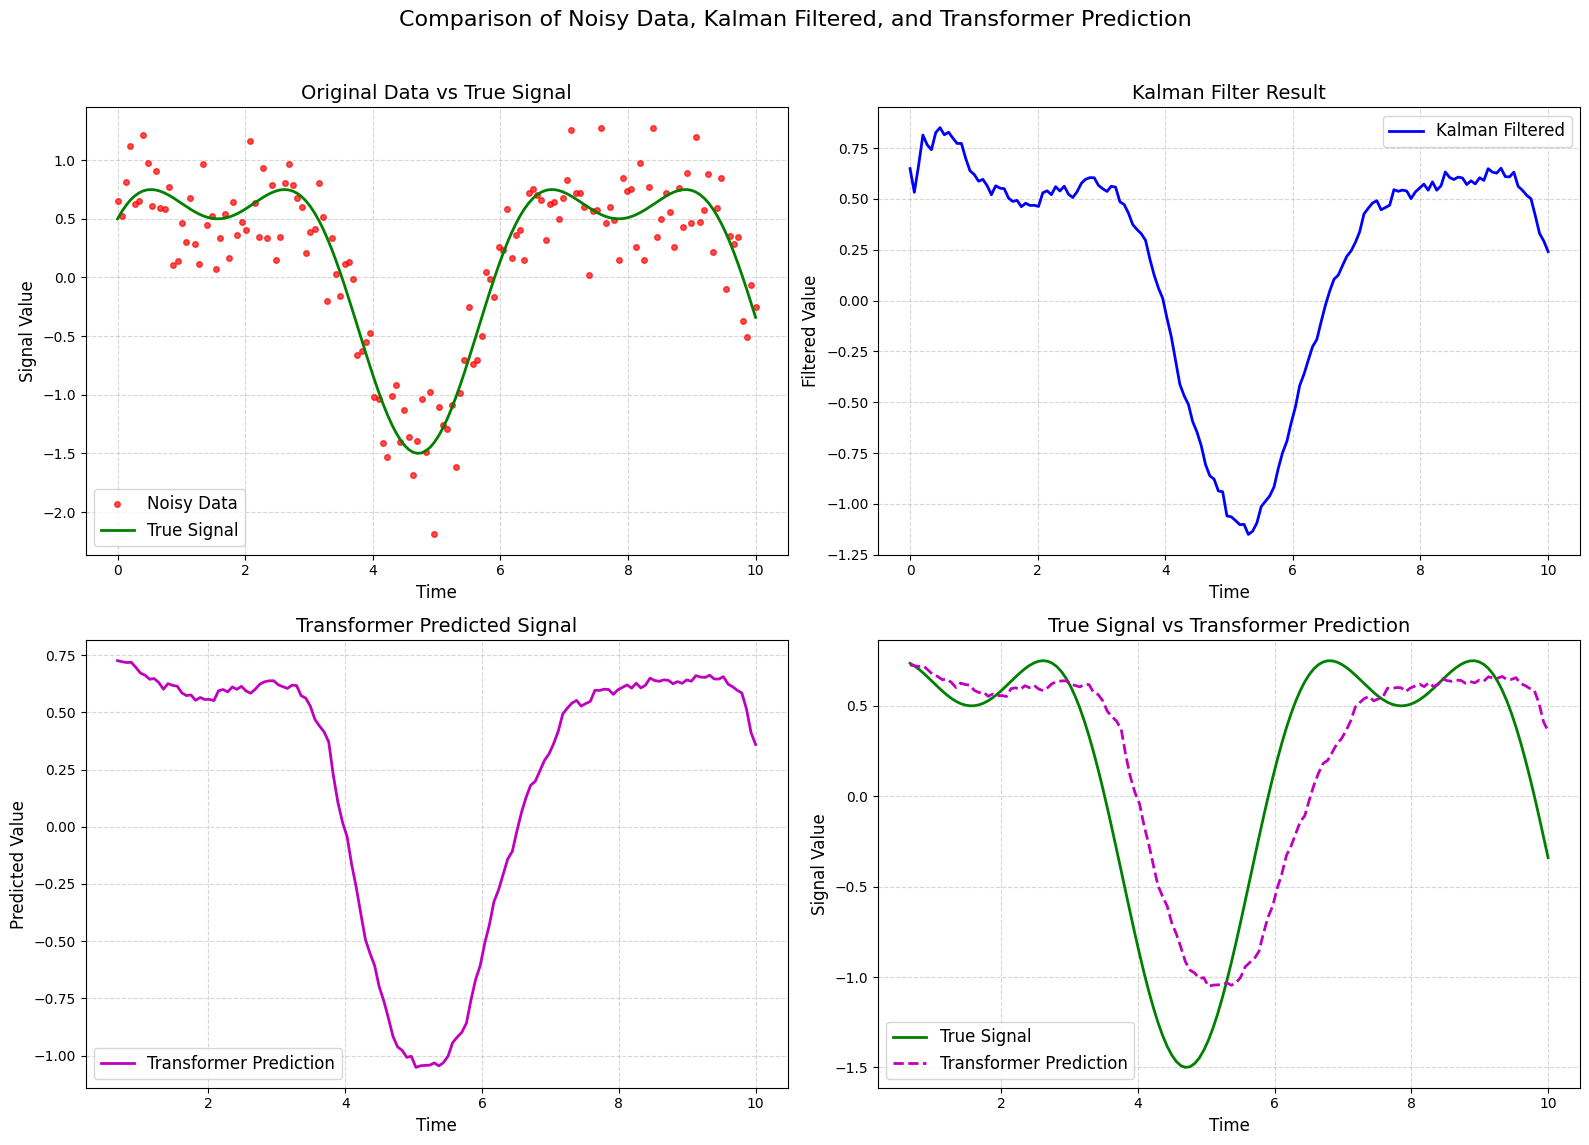

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 一、生成虚拟数据集
def generate_data(seq_length=150, noise_level=0.3, seed=42):
    """
    生成虚拟的时序数据。数据由正弦函数和余弦函数叠加构成，同时加入高斯噪声。
    
    参数：
    seq_length - 数据点总数
    noise_level - 噪声水平
    seed - 随机种子，保证结果可重复性
    
    返回：
    t       : 时间序列（numpy 数组）
    y_true  : 真实信号（无噪声）
    y_noisy : 含噪声的观测数据
    """
    np.random.seed(seed)
    t = np.linspace(0, 10, seq_length)
    # 构造真实信号：正弦函数与余弦函数叠加
    y_true = np.sin(t) + 0.5 * np.cos(2 * t)
    # 生成高斯噪声并加入真实信号
    noise = noise_level * np.random.randn(seq_length)
    y_noisy = y_true + noise
    return t, y_true, y_noisy

# 调用数据生成函数，得到时间序列 t、真实信号 y_true 与带噪数据 y_noisy
t, y_true, y_noisy = generate_data()

# 二、卡尔曼滤波实现
def kalman_filter(y_noisy, Q=1e-3, R=0.1):
    """
    对一维时序数据应用卡尔曼滤波进行平滑处理。
    
    参数：
    y_noisy - 带噪声的观测数据（numpy 数组）
    Q - 过程噪声协方差（较小，反映状态变化的平稳性）
    R - 观测噪声协方差（反映观测数据的不确定性）
    
    返回：
    x_est - 经过卡尔曼滤波的状态估计（平滑后信号）
    """
    n = len(y_noisy)
    x_est = np.zeros(n)  # 存放滤波后的状态估计
    P = np.zeros(n)      # 存放估计协方差
    
    # 初始状态估计：取第一个观测值；初始协方差设为 1
    x_est[0] = y_noisy[0]
    P[0] = 1.0
    
    # 循环进行预测与更新
    for k in range(1, n):
        # 预测步骤：这里简单采用上一时刻状态作为预测值（状态转移矩阵 A=1）
        x_pred = x_est[k - 1]
        P_pred = P[k - 1] + Q  # 预测协方差：上一协方差加上过程噪声
        
        # 更新步骤：计算卡尔曼增益，修正预测值
        K = P_pred / (P_pred + R)
        x_est[k] = x_pred + K * (y_noisy[k] - x_pred)
        P[k] = (1 - K) * P_pred
    return x_est

# 对原始含噪数据应用卡尔曼滤波，获得平滑后的信号
y_kalman = kalman_filter(y_noisy)

# 三、Transformer 模型构造与原理解析
class TransformerTimeSeries(nn.Module):
    """
    基于 Transformer 的时序预测模型。
    模型结构包括：输入嵌入层 -> Transformer 模块（Encoder-Decoder 结构） -> 全连接输出层。
    
    参数：
    input_dim  : 输入特征维度（本例为1）
    model_dim  : Transformer 模型的隐藏层维度
    num_heads  : 注意力头数
    num_layers : Transformer 层数（Encoder 和 Decoder 均采用相同层数）
    dropout    : dropout 概率，用于防止过拟合
    """
    def __init__(self, input_dim=1, model_dim=32, num_heads=4, num_layers=2, dropout=0.1):
        super(TransformerTimeSeries, self).__init__()
        # 输入嵌入层，将一维输入映射到 model_dim 维度
        self.embedding = nn.Linear(input_dim, model_dim)
        # 构造 Transformer 模块，采用 nn.Transformer 内置实现，Encoder 和 Decoder 均采用相同输入（自编码器方式）
        self.transformer = nn.Transformer(d_model=model_dim,
                                          nhead=num_heads,
                                          num_encoder_layers=num_layers,
                                          num_decoder_layers=num_layers,
                                          dropout=dropout)
        # 输出全连接层，将 Transformer 输出映射回一维预测值
        self.fc_out = nn.Linear(model_dim, 1)
        
    def forward(self, x):
        """
        前向传播函数。
        参数：
        x: 输入张量，形状为 (batch_size, seq_length, input_dim)
        
        返回：
        输出张量，形状为 (batch_size, seq_length, 1)
        """
        # 将输入数据经过嵌入层映射到高维空间
        x = self.embedding(x)
        # Transformer 模型要求的输入形状为 (seq_length, batch_size, model_dim)，因此进行转置
        x = x.permute(1, 0, 2)
        # 这里使用自注意力机制，Encoder 和 Decoder 均输入相同数据
        x = self.transformer(x, x)
        # 将 Transformer 输出映射为目标维度
        x = self.fc_out(x)
        # 恢复原始形状 (batch_size, seq_length, 1)
        x = x.permute(1, 0, 2)
        return x

# 四、数据预处理与训练集构造
def prepare_data(y, seq_length=10):
    """
    构造时序预测的训练数据集。将连续的时序数据分割成多个样本，每个样本包含 seq_length 个时间步的输入和下一个时刻的标签。
    
    参数：
    y          : 一维时序数据（可以是原始数据或滤波后数据）
    seq_length : 每个样本的输入序列长度
    
    返回：
    X - 特征数据，形状为 (样本数, seq_length, 1)
    Y - 标签数据，形状为 (样本数)
    """
    X, Y = [], []
    for i in range(len(y) - seq_length):
        X.append(y[i:i + seq_length])
        Y.append(y[i + seq_length])
    # 转换为 PyTorch 的 tensor，并增加一个特征维度
    return torch.tensor(X).float().unsqueeze(-1), torch.tensor(Y).float()

# 采用卡尔曼滤波后的数据作为 Transformer 模型的输入数据，便于提升预测效果
X_train, Y_train = prepare_data(y_kalman, seq_length=10)
print(X_train.shape)
dataset = TensorDataset(X_train, Y_train)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# 五、Transformer 模型训练过程
# 实例化 Transformer 模型
model = TransformerTimeSeries(input_dim=1, model_dim=32, num_heads=4, num_layers=2, dropout=0.1)
# 定义损失函数为均方误差损失（MSE Loss）
criterion = nn.MSELoss()
# 采用 Adam 优化器，学习率设定为 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, dataloader, epochs=50):
    """
    对 Transformer 模型进行训练。训练过程中每个 batch 计算损失，然后反向传播更新模型参数。
    
    参数：
    model     : Transformer 模型实例
    dataloader: 训练数据加载器
    epochs    : 训练轮数
    
    训练过程中，每个 epoch 后打印平均损失，便于观察训练趋势和模型收敛情况。
    """
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for X_batch, Y_batch in dataloader:
            print(X_batch.shape)
            optimizer.zero_grad()  # 清空梯度
            # 前向传播：输入 X_batch，得到 Transformer 模型的输出（所有时刻的预测结果）
            output = model(X_batch)
            # 取每个序列最后一个时间步的预测值作为最终输出
            Y_pred = output[:, -1, :].squeeze()
            loss = criterion(Y_pred, Y_batch)
            loss.backward()   # 反向传播计算梯度
            optimizer.step()  # 更新模型参数
            total_loss += loss.item()
        avg_loss = total_loss / len(dataloader)
        print(f"Epoch {epoch+1:03d} / {epochs}, Loss: {avg_loss:.6f}")

# 开始训练模型
train_model(model, dataloader, epochs=50)

# 六、模型预测与数据可视化
# 在训练完成后，将 Transformer 模型设为评估模式，并利用训练数据集进行预测
model.eval()
with torch.no_grad():
    # 对整个输入数据进行预测，取序列末尾的预测值作为最终结果
    output = model(X_train)
    y_transformer_pred = output[:, -1, :].squeeze().numpy()

# 七、数据可视化及图形说明
def plot_results():
    """
    绘制包含4个子图的大图，展示以下数据：
      1. Original Data vs True Signal  
         - 使用红色散点展示 Noisy Data，绿色曲线展示 True Signal  
         - 说明原始数据中噪声对信号的影响，以及真实信号的走向。
         
      2. Kalman Filter Result  
         - 使用蓝色曲线展示经过卡尔曼滤波后的平滑信号  
         - 展示卡尔曼滤波在去噪和平滑方面的效果，对比原始数据能明显看出噪声被抑制。
         
      3. Transformer Predicted Signal  
         - 使用洋红色曲线展示 Transformer 模型的预测结果  
         - 说明模型利用历史数据预测未来信号的能力，观察模型是否捕捉到趋势变化。
         
      4. True Signal vs Transformer Prediction  
         - 同时绘制绿色曲线（真实信号）和洋红色虚线（Transformer 预测），便于对比模型预测结果与真实信号的吻合程度。
         
    所有子图均采用具有感官冲击力的颜色，通过图例与标题详细说明每个子图的含义。
    """
    # 建立一个 2x2 的子图结构，总图大小设定为 16x12 英寸
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 子图 1：Original Data vs True Signal
    axes[0, 0].plot(t, y_noisy, 'r.', markersize=8, alpha=0.7, label='Noisy Data')
    axes[0, 0].plot(t, y_true, 'g-', linewidth=2, label='True Signal')
    axes[0, 0].set_title('Original Data vs True Signal', fontsize=14)
    axes[0, 0].set_xlabel('Time', fontsize=12)
    axes[0, 0].set_ylabel('Signal Value', fontsize=12)
    axes[0, 0].legend(fontsize=12)
    axes[0, 0].grid(True, linestyle='--', alpha=0.5)
    
    # 子图 2：Kalman Filter Result
    axes[0, 1].plot(t, y_kalman, 'b-', linewidth=2, label='Kalman Filtered')
    axes[0, 1].set_title('Kalman Filter Result', fontsize=14)
    axes[0, 1].set_xlabel('Time', fontsize=12)
    axes[0, 1].set_ylabel('Filtered Value', fontsize=12)
    axes[0, 1].legend(fontsize=12)
    axes[0, 1].grid(True, linestyle='--', alpha=0.5)
    
    # 子图 3：Transformer Predicted Signal
    # 由于 Transformer 模型的预测是从训练数据的第 11 个时间点开始（序列长度为 10），因此对应时间轴需要偏移
    predict_time = t[10:10+len(y_transformer_pred)]
    axes[1, 0].plot(predict_time, y_transformer_pred, 'm-', linewidth=2, label='Transformer Prediction')
    axes[1, 0].set_title('Transformer Predicted Signal', fontsize=14)
    axes[1, 0].set_xlabel('Time', fontsize=12)
    axes[1, 0].set_ylabel('Predicted Value', fontsize=12)
    axes[1, 0].legend(fontsize=12)
    axes[1, 0].grid(True, linestyle='--', alpha=0.5)
    
    # 子图 4：True Signal vs Transformer Prediction
    true_segment = y_true[10:10+len(y_transformer_pred)]
    axes[1, 1].plot(predict_time, true_segment, 'g-', linewidth=2, label='True Signal')
    axes[1, 1].plot(predict_time, y_transformer_pred, 'm--', linewidth=2, label='Transformer Prediction')
    axes[1, 1].set_title('True Signal vs Transformer Prediction', fontsize=14)
    axes[1, 1].set_xlabel('Time', fontsize=12)
    axes[1, 1].set_ylabel('Signal Value', fontsize=12)
    axes[1, 1].legend(fontsize=12)
    axes[1, 1].grid(True, linestyle='--', alpha=0.5)
    
    # 调整整体布局，使各子图之间不重叠，并设定总标题
    plt.suptitle('Comparison of Noisy Data, Kalman Filtered, and Transformer Prediction', fontsize=16, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()

plot_results()


In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset, random_split

x = torch.tensor([[1,1], [2,2], [3,3], [4,4], [5,5], [6,6], [7,7]])
y = torch.tensor([1,2,3,4,5,6,7])

dataset = TensorDataset(x,y)
train_dataset, test_dataset = random_split(dataset, [4, 3])

print(train_dataset[:])

(tensor([[6, 6],
        [3, 3],
        [4, 4],
        [5, 5]]), tensor([6, 3, 4, 5]))


In [8]:
import torch
import torch.nn as nn

# 定义神经网络
class SingleLayerNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SingleLayerNet, self).__init__()
        # 定义单个线性层
        self.linear = nn.Linear(in_features=input_dim, 
                               out_features=output_dim)
    
    def forward(self, x):
        # 前向传播：通过线性层
        out = self.linear(x)
        return out

# --------------------------
# 示例用法
# --------------------------

if __name__ == "__main__":
    # 设置参数
    input_dim = 10   # 输入特征维度
    output_dim = 5   # 输出特征维度
    batch_size = 3   # 批大小

    # 创建模型实例
    model = SingleLayerNet(20, output_dim)
    
    # 打印模型结构
    print("模型结构:")
    print(model)
    
    # 生成随机输入数据
    x = torch.randn(batch_size, input_dim, 20)  # shape: [3, 10]
    
    # 前向传播
    output = model(x)
    
    # 打印输出结果
    print("\n输入形状:", x.shape)
    print("输出形状:", output.shape)
    print("\n前3个样本的输出示例:")
    print(output)

模型结构:
SingleLayerNet(
  (linear): Linear(in_features=20, out_features=5, bias=True)
)

输入形状: torch.Size([3, 10, 20])
输出形状: torch.Size([3, 10, 5])

前3个样本的输出示例:
tensor([[[-0.0756,  0.7473,  1.0564,  0.2725,  0.8614],
         [ 0.1039,  0.8008,  0.9195,  1.0703,  0.9789],
         [ 0.3596, -0.3920,  0.0724, -0.3199, -0.2100],
         [ 0.2259,  0.1826,  0.3812, -0.0281,  0.2861],
         [-0.1274,  0.5550,  0.4859,  0.1172,  0.3532],
         [-0.4267,  0.5544,  0.3043,  0.0673,  0.6002],
         [ 0.3817,  0.4111,  0.0077, -0.1533, -0.0500],
         [ 0.3110,  0.3331, -0.3116,  0.4077,  0.9141],
         [ 0.1817,  0.9595,  0.2959,  0.2309,  0.6635],
         [-0.7728, -1.2180,  0.2332, -0.1493,  0.1157]],

        [[-0.3624, -0.1314,  1.9791, -0.0159,  0.6907],
         [-0.3848,  0.4734,  1.5797, -0.3050,  0.6885],
         [-0.5546, -0.7310,  0.0978,  0.4279, -0.2886],
         [-0.1615, -0.2032, -0.1288,  1.0454,  0.0314],
         [ 0.1704,  0.5333,  1.6015,  0.4394,  0.5292],

In [1]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
from Models.SeEANet import SeEANet
import torch.optim as optim
import torch.nn as nn
from datetime import datetime
from utils.tools import make_datasets,make_dir
from torchsummary import summary

# 生成含趋势、周期和噪声的合成数据
def generate_finance_data(seq_length=200, noise_level=0.5):
    t = np.linspace(0, 20, seq_length)
    trend = 0.05 * t ** 2  # 二次趋势项
    seasonality = 2 * np.sin(0.5 * t) + 1.5 * np.cos(1.2 * t)  # 多频率周期项
    y_true = trend + seasonality
    noise = noise_level * np.random.randn(seq_length)
    y_noisy = y_true + noise
    return t, y_true, y_noisy
 
t, y_true, y_noisy = generate_finance_data()

def kalman_filter_1d(y_noisy, Q=1e-4, R=0.1):
    n = len(y_noisy)
    x_est = np.zeros(n)  # 状态估计序列
    P = np.zeros(n)  # 协方差序列
    x_est[0] = y_noisy[0]  # 初始状态：第一个观测值
    P[0] = 1.0  # 初始协方差：假设初始估计不确定性大
    
    for k in range(1, n):
        # 预测阶段：基于前一时刻估计值外推
        x_pred = x_est[k-1]  # 状态预测（假设A=1，无控制输入）
        P_pred = P[k-1] + Q  # 协方差预测：累积过程噪声Q
        
        # 更新阶段：用当前观测值修正预测
        K = P_pred / (P_pred + R)  # 卡尔曼增益：噪声越小，K越接近1
        x_est[k] = x_pred + K * (y_noisy[k] - x_pred)  # 状态更新：融合预测与观测
        P[k] = (1 - K) * P_pred  # 协方差更新：观测降低不确定性
    return x_est
 
y_kalman = kalman_filter_1d(y_noisy)

class TransformerPredictor(nn.Module):
    def __init__(self, input_dim=1, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.embedding = nn.Linear(input_dim, d_model)  # 输入特征映射
        self.pos_encoder = PositionalEncoding(d_model, dropout)  # 位置编码
        # Transformer编码器层（含因果掩码，避免未来信息泄露）
        encoder_layer = nn.TransformerEncoderLayer(
            d_model, nhead, dim_feedforward=256, dropout=dropout, batch_first=True,
            norm_first=True  # 先归一化，再残差连接，提升稳定性
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(d_model, 1)  # 输出层
        
    def forward(self, x):
        # 输入形状：(batch_size, seq_length, input_dim)
        x = self.embedding(x) * np.sqrt(self.d_model)  # 缩放嵌入，稳定梯度
        x = self.pos_encoder(x)  # 注入位置信息
        # 因果掩码：确保第i步只能看到前i步的信息
        seq_len = x.size(1)
        mask = torch.triu(torch.ones(seq_len, seq_len, dtype=torch.bool), diagonal=1)
        x = self.transformer_encoder(x, src_key_padding_mask=None, mask=mask)
        output = self.fc(x)  # 输出形状：(batch_size, seq_length, 1)
        return output
 
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        # 预计算位置编码，避免重复计算
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # x形状：(batch_size, seq_length, d_model)
        x = x + self.pe[:x.size(1), :]  # 叠加位置编码
        return self.dropout(x)
    

def create_dataset(y, lookback=15):
    """将序列转换为滑动窗口样本：输入为前lookback步，标签为第lookback+1步"""
    X, y_label = [], []
    for i in range(lookback, len(y)):
        X.append(y[i-lookback:i])
        y_label.append(y[i])
    return (torch.tensor(X).float().unsqueeze(-1),  # 形状：(样本数, lookback, 1)
            torch.tensor(y_label).float())
 
X_train, y_train = create_dataset(y_kalman)  # 输入为卡尔曼滤波后的数据
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
 
model = TransformerPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
 
def train_model(model, dataloader, epochs=80):
    for epoch in range(epochs):
        model.train()
        total_loss = 0.0
        for X_batch, y_batch in dataloader:
            print(X_batch.shape)
            optimizer.zero_grad()
            output = model(X_batch)[:, -1, :].squeeze()  # 取最后一步预测
            print(output.shape)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1:03d}, Loss: {total_loss/len(dataloader):.4f}")
print(model)
train_model(model, dataloader)

/tmp/ipykernel_259965/3560933107.py:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return (torch.tensor(X).float().unsqueeze(-1),  # 形状：(样本数, lookback, 1)
/home/admin123/anaconda3/envs/pt/lib/python3.9/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


TransformerPredictor(
  (embedding): Linear(in_features=1, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
torch.Size([16, 15, 1])
torch.Size([16])
torch.Size([16,

KeyboardInterrupt: 

/tmp/ipykernel_200555/2721485015.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return (torch.tensor(X).float().unsqueeze(-1),  # 形状：(样本数, lookback, 1)
/home/admin123/anaconda3/envs/pt/lib/python3.9/site-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(


TransformerPredictor(
  (embedding): Linear(in_features=1, out_features=64, bias=True)
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=256, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=256, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch

In [ ]:
def visualize_results():
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 原始数据与真实信号：噪声显著干扰观测
    axes[0, 0].plot(t, y_noisy, 'r.', alpha=0.6, label='Noisy Data')
    axes[0, 0].plot(t, y_true, 'g-', label='True Signal', linewidth=2)
    axes[0, 0].set_title('1. 原始数据：噪声掩盖真实趋势与周期')
    
    # 卡尔曼滤波结果：噪声被有效抑制
    axes[0, 1].plot(t, y_kalman, 'b-', linewidth=2, label='Kalman Filtered')
    axes[0, 1].set_title('2. 卡尔曼滤波：去除高频噪声，保留低频趋势')
    
    # Transformer预测结果：基于去噪数据的长程依赖建模
    with torch.no_grad():
        y_pred = model(X_train).squeeze().numpy()
    predict_t = t[15:]  # lookback=15，预测从第15步开始
    axes[1, 0].plot(predict_t, y_pred, 'm-', label='Transformer Prediction')
    axes[1, 0].set_title('3. Transformer预测：捕捉多尺度依赖（趋势+周期）')
    
    # 真实值与预测值对比：融合后误差显著降低
    axes[1, 1].plot(predict_t, y_true[15:], 'g-', label='True Signal')
    axes[1, 1].plot(predict_t, y_pred, 'm--', label='Prediction', alpha=0.8)
    axes[1, 1].set_title('4. 融合效果：预测曲线紧密贴合真实信号')
    
    for ax in axes.flatten():
        ax.legend()
        ax.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
 
visualize_results()

In [2]:
import torch
from tensorboardX import SummaryWriter
from Models.SeEANet import SeEANet
from datetime import datetime
import os

In [4]:
modelName = "SAT"
formatted_time = datetime.now().strftime("%m-%d-%H:%M:%S")
checkpoint_save_path = os.path.join(os.getcwd(), "Run", modelName,formatted_time + ".pth")
checkpoint_save_path

'/home/admin123/SATNet/Run/SAT/04-12-16:51:47.pth'

In [8]:
import matplotlib.pyplot as plt
import torch

# 可视化卷积核
from Models.SeEANet import SeEANet

# 定义模型
model = SeEANet()
# 创建虚拟输入数据
dummy_input = torch.randn(1, 6, 256)  # 根据你的模型输入形状调整

# 前向传播以初始化模型参数
model(dummy_input)

# 现在可以访问卷积核了
filters = model.conv1.weight.detach().numpy()

# 可视化卷积核
for i in range(filters.shape[0]):
    # 确保卷积核是 2D 的
    kernel = filters[i, 0]
    if kernel.ndim == 1:
        # 如果是 1D，可以将其转换为 2D
        kernel = kernel.reshape(1, -1)
    plt.imshow(kernel, cmap="gray")
    plt.axis("off")
    plt.savefig(f"filter_{i}.png", bbox_inches="tight", pad_inches=0)
    plt.close()

In [5]:
import torch
import torch.nn as nn

# 假设输出形状为 (batch_size, 3)
batch_size = 32
outputs = torch.randn(batch_size, 3)  # 网络输出
labels = torch.randn(batch_size, 3)   # 真实值

# 定义权重
weights = torch.tensor([0.5, 1.0, 2.0], dtype=torch.float32)  # 权重可以是任意正数

# 计算加权的均方误差
print((weights *(outputs - labels) ** 2).shape)
mse_loss = torch.mean(weights * (outputs - labels) ** 2)

print(f"加权MSE损失: {mse_loss.item()}")

torch.Size([32, 3])
加权MSE损失: 2.647390127182007


In [4]:
import torch
from torchviz import make_dot
from Models.SeEANet import SeEANet

# 定义模型
model = SeEANet()

# 创建虚拟输入
x = torch.randn(1, 10)

# 生成计算图
dot = make_dot(model(x), params=dict(model.named_parameters()))
dot.render("model_visualization", format="pdf")  # 保存为 PDF 文件

IndexError: too many indices for tensor of dimension 2

In [3]:
writer = SummaryWriter()

model = SeEANet()
model = model.cuda()
inputs = torch.randn(24, 6, 256)
inputs = inputs.cuda()
# summary(model, input_size=(6, 256))
outputs = model(inputs)
print("outpus's shape :", outputs.shape)

writer.add_graph(model, input_to_model=(24, 6, 256))

writer.close()

outpus's shape : torch.Size([24, 1])
Type 'Tuple[int, int, int]' cannot be traced. Only Tensors and (possibly nested) Lists, Dicts, and Tuples of Tensors can be traced
Error occurs, No graph saved


RuntimeError: Type 'Tuple[int, int, int]' cannot be traced. Only Tensors and (possibly nested) Lists, Dicts, and Tuples of Tensors can be traced